<a href="https://colab.research.google.com/github/robert-korir/MSc-Data-Science-/blob/main/Dissertation_Final_Robert_Korir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(14,6)
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
plt.style.use("seaborn-dark")
plt.style.use("seaborn-ticks")

<ipython-input-1-6298d4298bd2>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")
<ipython-input-1-6298d4298bd2>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-ticks")


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/robert-korir/MSc-Data-Science-/main/kirinyaga_dashboard.csv')
data['Date'] = pd.to_datetime(data['date1'])
data.set_index('Date', inplace=True)
data

,date1,dataSets,subCounty,schedules,scheduleParts,schedulePartsSubPart,subPartFee,posServiceCategory,amount,billType
Date,,,,,,,,,,
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Passion Fruit(Full Bag (50kg)),Market,120.0,POS
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Sweet Potatoes(1 Bag 50kg),Market,300.0,POS
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Kirinyaga Central,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Potatoes(Per 50kg Sack),Market,120.0,POS
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Potatoes(½ Sack),Market,40.0,POS
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Kirinyaga Central,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,All Other Vegetables(½ Sack),Market,200.0,POS
...,...,...,...,...,...,...,...,...,...,...
2022-10-13,13/10/2022 00:00:00,BackOffice-Cashiers,Mwea East,Health Services,Public Health,Public Health,Bicycle Shops/ Cycle Marts - Public Health Cer...,NaN,1000.0,SBP/Liquor related Bills
2022-10-13,13/10/2022 00:00:00,BackOffice-Cashiers,Mwea East,Health Services,Public Health,Public Health,Bicycle Shops/ Cycle Marts - Public Health Ins...,NaN,300.0,SBP/Liquor related Bills
2022-10-13,13/10/2022 00:00:00,BackOffice-Cashiers,Mwea East,Land Housing & Urban Development,Department Of Land Survey & Gis,General Charges (Department Of Land Survey & Gis),Sale Of Minutes/Search,NaN,1000.0,General Bills


In [ ]:
# Mapping of current names to more understandable names
name_mapping = {
    'schedules': 'Department',
    'scheduleParts': 'Revenue Category',
    'schedulePartsSubPart': 'Service Type',
    'subPartFee': 'Specific Service',
    'posServiceCategory': 'Transaction Type'
}

# Renaming the columns using the mapping
data_renamed = data.rename(columns=name_mapping)

# Display the first few rows of the updated DataFrame to verify the changes
data_renamed.head()

,date1,dataSets,subCounty,Department,Revenue Category,Service Type,Specific Service,Transaction Type,amount,billType
Date,,,,,,,,,,
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Passion Fruit(Full Bag (50kg)),Market,120.0,POS
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Sweet Potatoes(1 Bag 50kg),Market,300.0,POS
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Kirinyaga Central,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Potatoes(Per 50kg Sack),Market,120.0,POS
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Potatoes(½ Sack),Market,40.0,POS
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Kirinyaga Central,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,All Other Vegetables(½ Sack),Market,200.0,POS


In [ ]:
data_renamed.head()

,date1,dataSets,subCounty,Department,Revenue Category,Service Type,Specific Service,Transaction Type,amount,billType
Date,,,,,,,,,,
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Passion Fruit(Full Bag (50kg)),Market,120.0,POS
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Sweet Potatoes(1 Bag 50kg),Market,300.0,POS
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Kirinyaga Central,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Potatoes(Per 50kg Sack),Market,120.0,POS
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Potatoes(½ Sack),Market,40.0,POS
2021-08-10,08/10/2021 00:00:00,POS-Collectors,Kirinyaga Central,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,All Other Vegetables(½ Sack),Market,200.0,POS


In [ ]:
# Rename the columns to the new desired format
data_renamed = data.rename(columns={
    'schedules': 'department',  # Renaming 'schedules' to 'department'
    'scheduleparts': 'revenue_category',  # Renaming 'scheduleparts' to 'revenue_category'
    'schedulepartssubpart': 'service_type',  # Renaming 'schedulepartssubpart' to 'service_type'
    'subpartfee': 'specific_service',  # Renaming 'subpartfee' to 'specific_service'
    'posservicecategory': 'transaction_type'  # Renaming 'posservicecategory' to 'transaction_type'
})

# Standardize column names
data_renamed.columns = data_renamed.columns.str.lower().str.replace(' ', '_')

# Convert 'date1' to datetime format
data_renamed['date1'] = pd.to_datetime(data_renamed['date1'], errors='coerce')

# Define the list of categorical columns with the new names
categorical_columns = [
    'subcounty',
    'department',
    'revenue_category',
    'service_type',
    'specific_service',
    'transaction_type',
    'billtype'
]

# # Convert categorical columns to 'category' dtype
# for column in categorical_columns:
#     data_renamed[column] = data_renamed[column].astype('category')

# Trim string data
string_columns = data_renamed.select_dtypes(include='object').columns
data_renamed[string_columns] = data_renamed[string_columns].apply(lambda x: x.str.strip())

# Check for duplicates
duplicates = data_renamed.duplicated().sum()

# Check for missing values
missing_values = data_renamed.isnull().sum()

# Display the cleaned DataFrame structure, duplicates, and missing values
data_cleaned_structure = data_renamed.head()
(duplicates, missing_values, data_cleaned_structure)


(56,
 date1                       0
 datasets                    0
 subcounty                   0
 department                  0
 scheduleparts               0
 schedulepartssubpart        0
 subpartfee                  0
 posservicecategory      18187
 amount                      0
 billtype                    0
 dtype: int64,
                 date1        datasets          subcounty  \
 Date                                                       
 2021-08-10 2021-08-10  POS-Collectors               Ndia   
 2021-08-10 2021-08-10  POS-Collectors               Ndia   
 2021-08-10 2021-08-10  POS-Collectors  Kirinyaga Central   
 2021-08-10 2021-08-10  POS-Collectors               Ndia   
 2021-08-10 2021-08-10  POS-Collectors  Kirinyaga Central   
 
                                          department  \
 Date                                                  
 2021-08-10  Trade, Cooperatives, Tourism & Industry   
 2021-08-10  Trade, Cooperatives, Tourism & Industry   
 2021-08-10  Trad

In [ ]:
# # Add a new category "Unknown" to the 'transaction_type' categorical column
# data_renamed['transaction_type'] = data_renamed['transaction_type'].cat.add_categories(["Unknown"])

# # Optionally, fill missing values in 'transaction_type' with "Unknown"
# data_renamed['transaction_type'] = data_renamed['transaction_type'].fillna("Unknown")


**Exploratory Data Analysis (EDA)**

In [ ]:
# Summary statistics
print(data.describe())

             amount
count  8.796300e+04
mean   1.362270e+03
std    1.466183e+04
min    0.000000e+00
25%    1.000000e+02
50%    3.900000e+02
75%    1.000000e+03
max    2.002070e+06


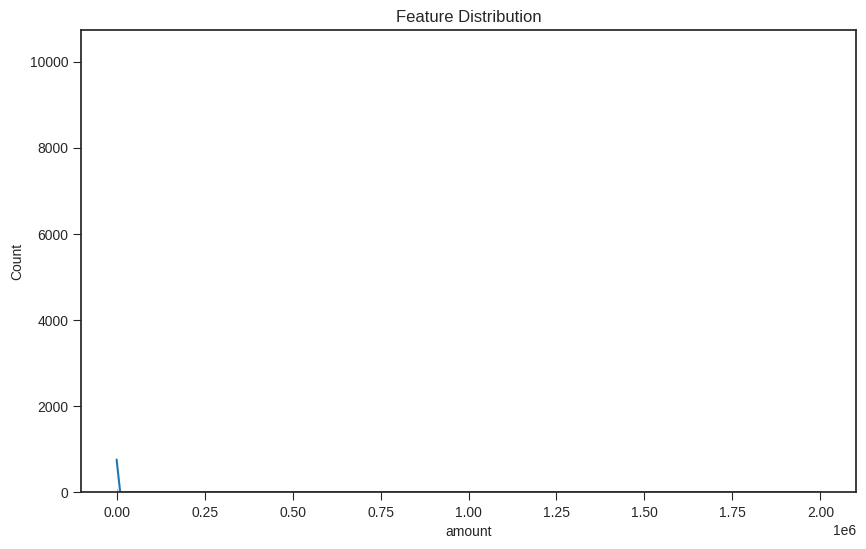

In [ ]:
# Distribution of key features
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], kde=True)  # Update 'your_feature'
plt.title('Feature Distribution')
plt.show()

<ipython-input-8-05e21d8df33a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


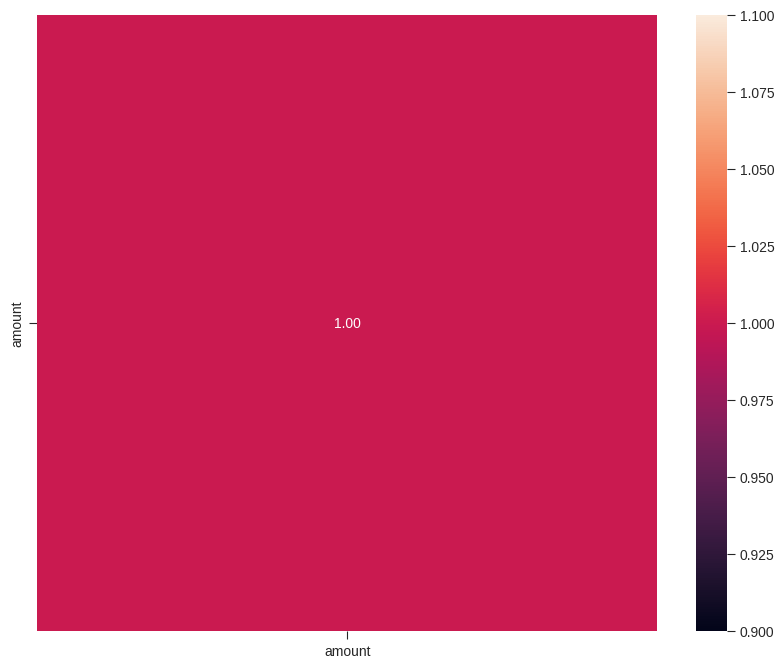

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

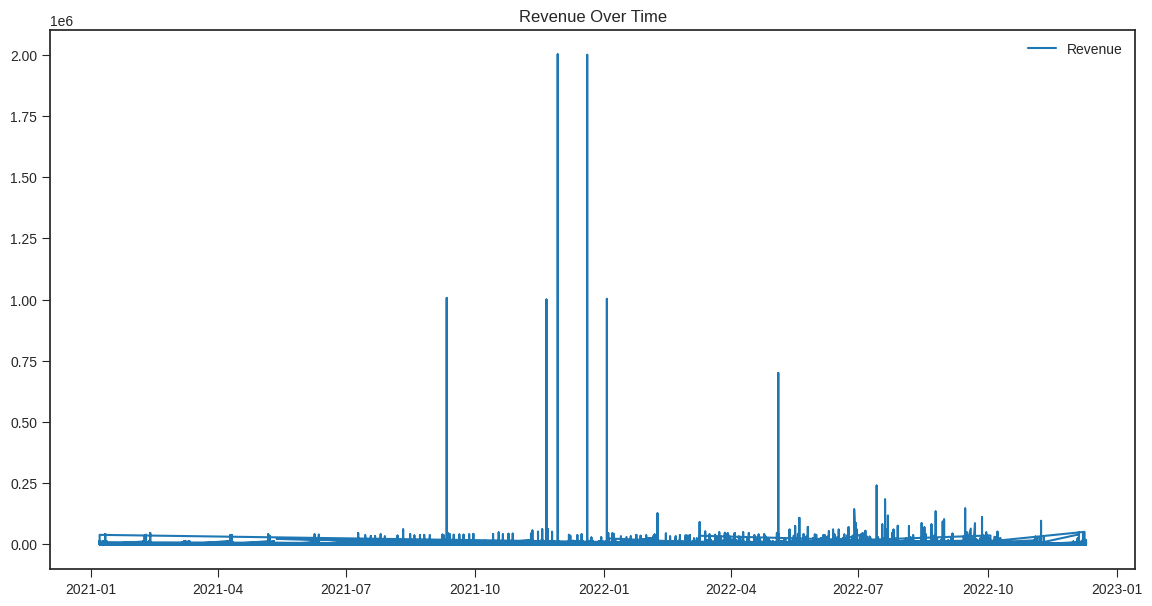

In [ ]:
# Time series plot (if applicable)
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['amount'], label='Revenue')  # Update 'your_target_variable'
plt.title('Revenue Over Time')
plt.legend()
plt.show()

**Stationarity Tests (Augmented Dickey-Fuller Test)**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(data['amount'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -39.845682
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


The test statistic is less than the critical value, we reject the null hypothesis and conclude that the time series is stationary.

**Autocorrelation and Partial Autocorrelation Analysis**

<Figure size 1400x600 with 0 Axes>

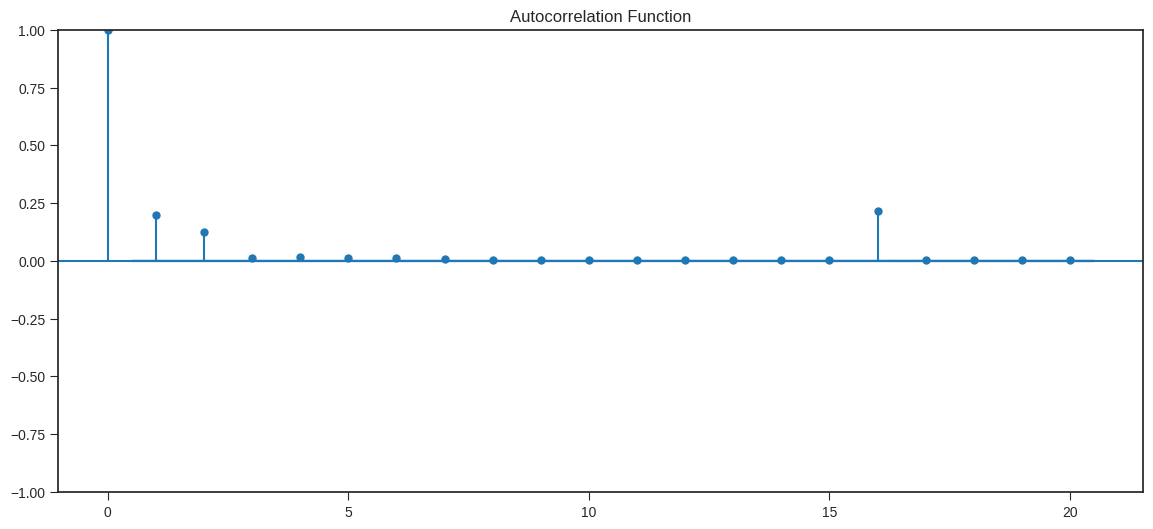

<Figure size 1400x600 with 0 Axes>

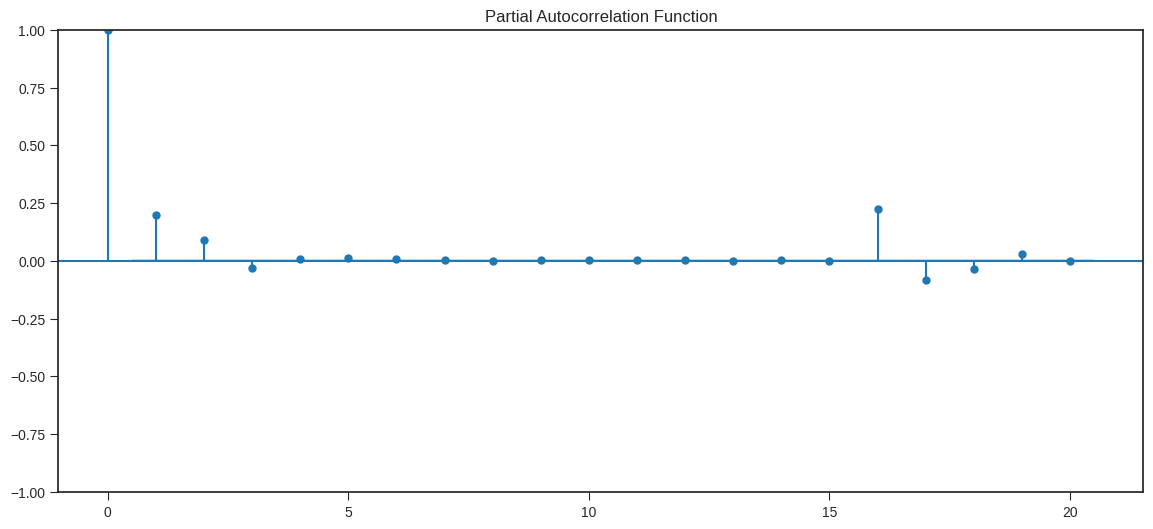

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot Autocorrelation Function (ACF)
plt.figure()
plot_acf(data['amount'], lags=20)
plt.title('Autocorrelation Function')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure()
plot_pacf(data['amount'], lags=20)
plt.title('Partial Autocorrelation Function')
plt.show()


These snippets plot the Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF) for the 'revenue' time series. The ACF shows the correlation of the series with its lagged values. The PACF shows the partial correlation of the series with its lagged values, controlling for the values of the time series at all shorter lags.

**Time-Series Cross-Validation**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Define the time-series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Iterate through train-test splits
for train_index, test_index in tscv.split(data['amount']):
    X_train, X_test = data['amount'][train_index], data['amount'][test_index]
    # Here you would fit your model on X_train and evaluate on X_test


**Seasonality Checks**

<Axes: xlabel='Date'>

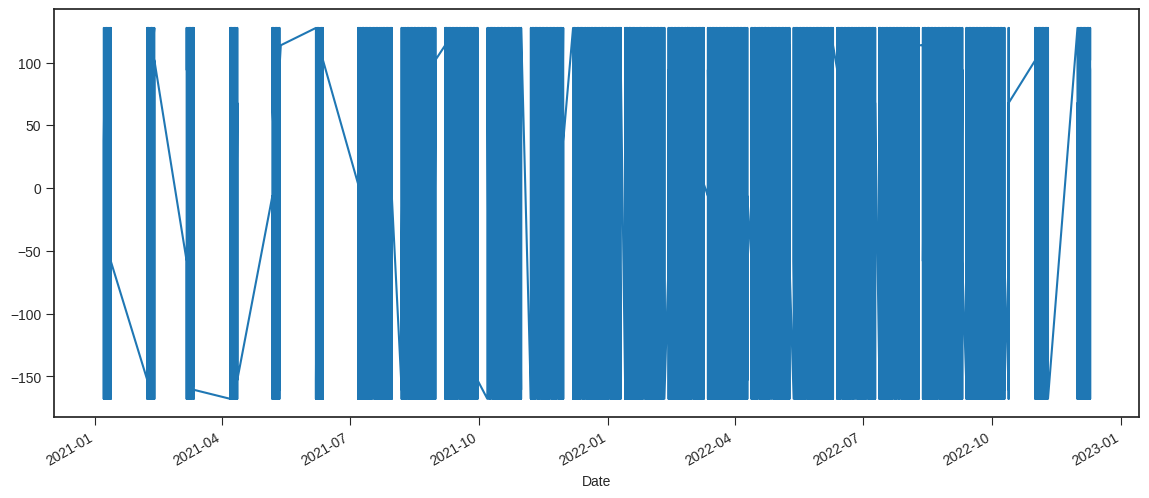

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series to observe seasonality
result = seasonal_decompose(data['amount'], model='additive', period=12)
result.seasonal.plot()


The period=12 parameter is set assuming monthly data and looking for yearly seasonality. This decomposition can help identify and understand any recurring patterns in the data.

**Outlier Detection using Z-score**

In [ ]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data['amount']))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)
print("Outlier indices:", outliers[0])


Outlier indices: [ 1330  4347  4522  4918  5597  6116  6664  6771  7323  7949  7965  8513
 11384 11484 11485 11486 30023 31445 32425 33180 33309 33683 33862 35258
 36745 36746 36747 36748 36749 36750 36751 36752 36753 36805 37622 37653
 37688 37953 38341 38884 39736 39938 39982 41559 43824 59773 63602 65169
 80283 80797 81269 81532 81589 81596 81668 81788 82612 82681 82730 82849
 82851 82967 82978 83097 83216 83410 83470 83601 83610 83649 84004 84044
 84080 84124 84284 84577 84777 85102 85153 85969 86118 86267 86274 86496
 86520 86793 86831 87098 87256 87350 87549]


**Handling Outliers**

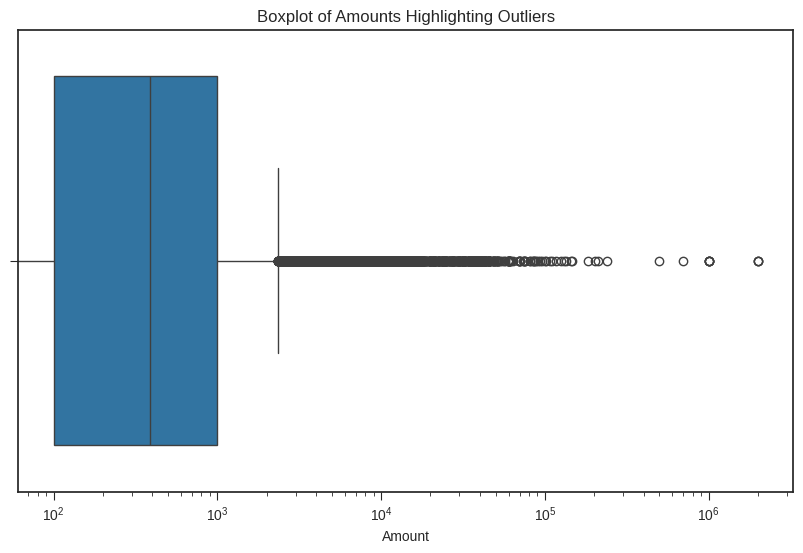

(                date1        datasets  subcounty  \
 Date                                               
 2021-08-10 2021-08-10  POS-Collectors       Ndia   
 2021-09-10 2021-09-10  POS-Collectors       Ndia   
 2021-09-10 2021-09-10  POS-Collectors  Mwea East   
 2021-09-10 2021-09-10  POS-Collectors    Gichugu   
 2021-09-10 2021-09-10  POS-Collectors       Ndia   
 
                                                 department  \
 Date                                                         
 2021-08-10         Trade, Cooperatives, Tourism & Industry   
 2021-09-10                        Transport & Public Works   
 2021-09-10  Agriculture, Livestock, Veterinary & Fisheries   
 2021-09-10  Agriculture, Livestock, Veterinary & Fisheries   
 2021-09-10          Environment, Water & Natural Resources   
 
                                          scheduleparts schedulepartssubpart  \
 Date                                                                          
 2021-08-10  County Mark

In [ ]:
# Identifying outliers in the 'amount' column using the IQR (Interquartile Range) method
Q1 = data_renamed['amount'].quantile(0.25)
Q3 = data_renamed['amount'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as those beyond 1.5 times the IQR from the quartiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the dataset to include only the outlier transactions
outliers = data_renamed[(data_renamed['amount'] < lower_bound) | (data_renamed['amount'] > upper_bound)]

# Visualizing outliers with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_renamed['amount'])
plt.title('Boxplot of Amounts Highlighting Outliers')
plt.xlabel('Amount')
plt.xscale('log')  # Using logarithmic scale due to wide range of amounts
plt.show()

# Summary of outliers
outliers_summary = outliers.describe(include='all', datetime_is_numeric=True)

outliers.head(), outliers_summary


**Removing outliers**

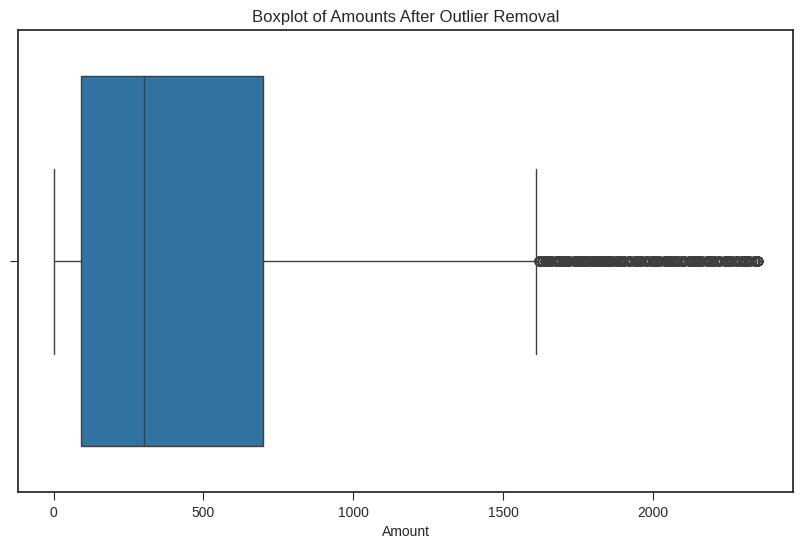

             amount
count  76953.000000
mean     488.629566
std      530.049779
min        0.000000
25%       90.000000
50%      300.000000
75%      700.000000
max     2350.000000


In [ ]:
# Removing outliers
data_cleaned = data_renamed[(data_renamed['amount'] >= lower_bound) & (data_renamed['amount'] <= upper_bound)]

# Visualizing the 'amount' column after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['amount'])
plt.title('Boxplot of Amounts After Outlier Removal')
plt.xlabel('Amount')
plt.show()

# Quick summary of data after outlier removal
print(data_cleaned.describe())


**Handling Missing Values**

In [ ]:
# Handle missing values
# For now, we'll fill missing values in 'posServiceCategory' with a placeholder 'Unknown'
data['posServiceCategory'].fillna('Unknown', inplace=True)

# Ensure correct data types
# Convert 'date1' to datetime format
data['date1'] = pd.to_datetime(data['date1'], errors='coerce')

# Check for and remove duplicates
initial_count = len(data)
data.drop_duplicates(inplace=True)
final_count = len(data)
duplicates_removed = initial_count - final_count

# Check the new data types and the number of duplicates removed
new_data_types = data.dtypes
duplicates_removed

56

In [ ]:
# Replacing NaN values with the mean of the respective column
data.fillna(data.mean(), inplace=True)

# Displaying the DataFrame after NaN replacement
print(data)

<ipython-input-15-5bff63302eeb>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)


                date1             dataSets          subCounty  \
Date                                                            
2021-08-10 2021-08-10       POS-Collectors               Ndia   
2021-08-10 2021-08-10       POS-Collectors               Ndia   
2021-08-10 2021-08-10       POS-Collectors  Kirinyaga Central   
2021-08-10 2021-08-10       POS-Collectors               Ndia   
2021-08-10 2021-08-10       POS-Collectors  Kirinyaga Central   
...               ...                  ...                ...   
2022-10-13 2022-10-13  BackOffice-Cashiers          Mwea East   
2022-10-13 2022-10-13  BackOffice-Cashiers          Mwea East   
2022-10-13 2022-10-13  BackOffice-Cashiers          Mwea East   
2022-10-13 2022-10-13  BackOffice-Cashiers          Mwea East   
2022-10-13 2022-10-13  BackOffice-Cashiers  Kirinyaga Central   

                                          schedules  \
Date                                                  
2021-08-10  Trade, Cooperatives, Tourism & I

<ipython-input-15-5bff63302eeb>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
#Check if there is still missing values
data.isnull().sum()

date1                   0
dataSets                0
subCounty               0
schedules               0
scheduleParts           0
schedulePartsSubPart    0
subPartFee              0
posServiceCategory      0
amount                  0
billType                0
dtype: int64

In [ ]:
#Descriptive statistics
# Descriptive statistics for the numerical columns, focusing on 'amount'
descriptive_stats = data.describe(include=[float])

descriptive_stats


,amount
count,8.790700e+04
mean,1.362240e+03
std,1.466646e+04
min,0.000000e+00
25%,1.000000e+02
50%,3.900000e+02
75%,1.000000e+03
max,2.002070e+06


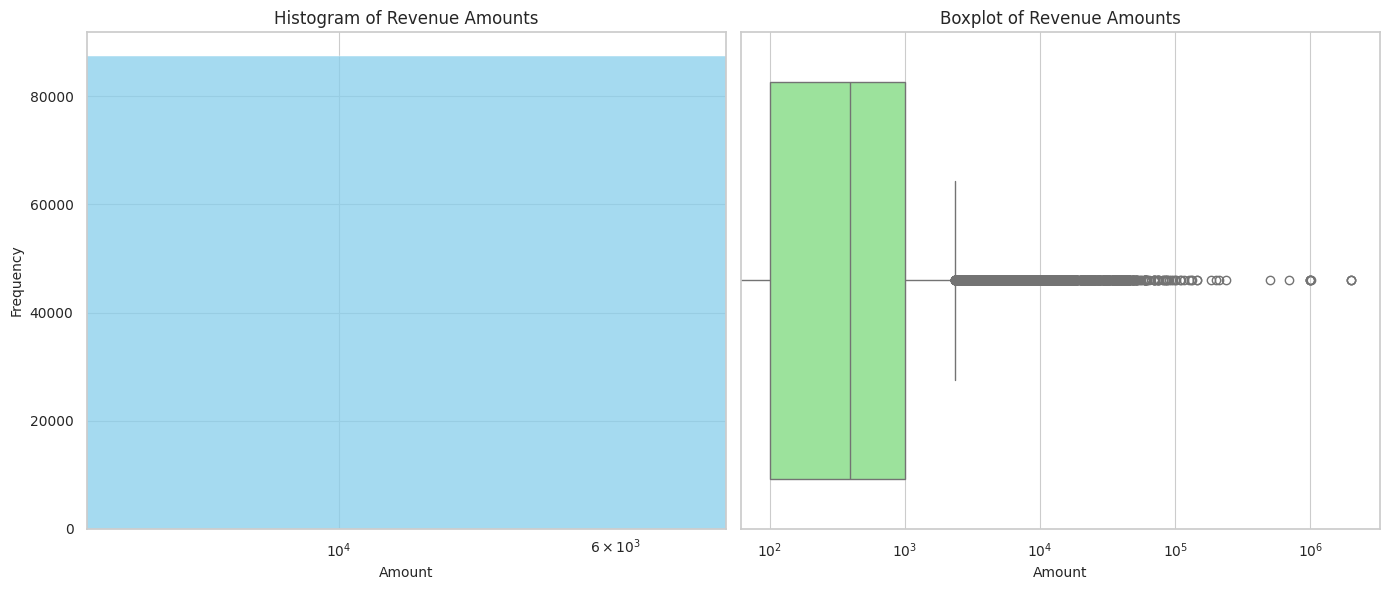

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram of the 'amount' column
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['amount'], bins=100, color='skyblue')
plt.title('Histogram of Revenue Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xscale('log')  # Using a logarithmic scale due to wide range of values
plt.xlim(right=data['amount'].quantile(0.95))  # Limiting x-axis to 95th percentile to focus on common amounts

# Boxplot of the 'amount' column
plt.subplot(1, 2, 2)
sns.boxplot(x=data['amount'], color='lightgreen')
plt.title('Boxplot of Revenue Amounts')
plt.xlabel('Amount')
plt.xscale('log')  # Using a logarithmic scale due to wide range of values

plt.tight_layout()
plt.show()


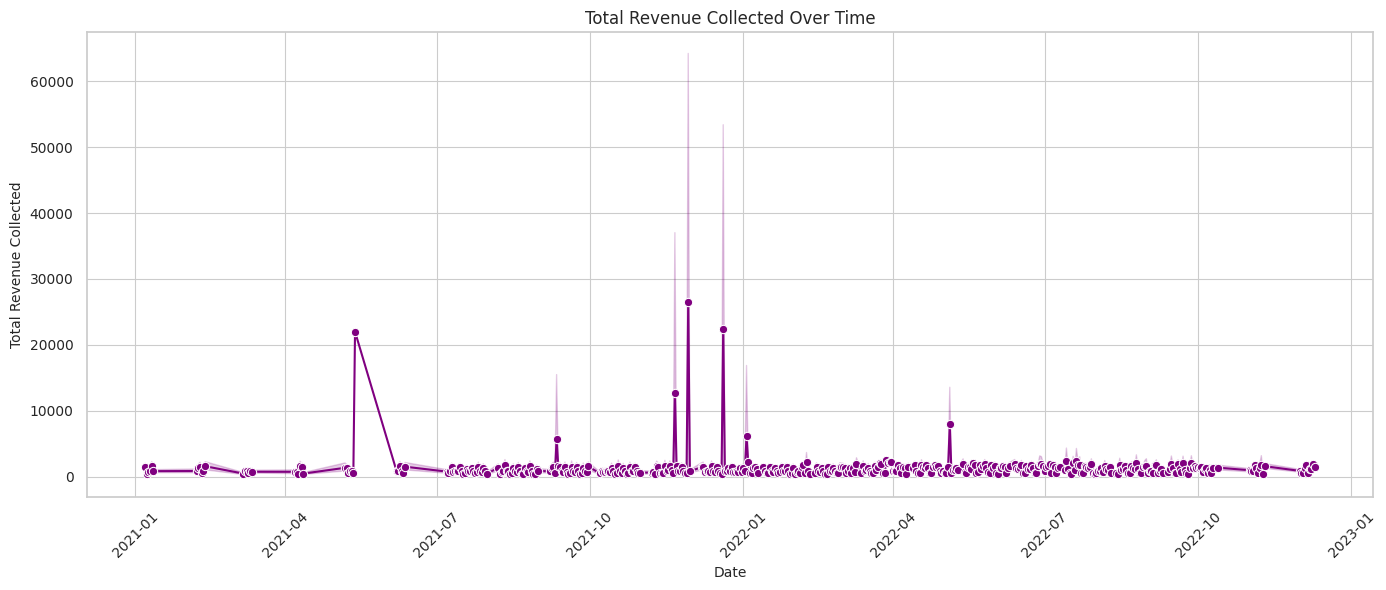

In [ ]:
# Ensuring 'month' column is in a suitable format for plotting
data_renamed['date1'] = data_renamed['date1'].astype(str)

# Retry Time Series Plot of Total Revenue Collected Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='amount', data=data_renamed, marker='o', color='purple')
plt.title('Total Revenue Collected Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue Collected')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
 # Creating temporal features
data['year'] = data['date1'].dt.year
data['month'] = data['date1'].dt.month
data['day_of_week'] = data['date1'].dt.dayofweek  # Monday=0, Sunday=6

# Categorical encoding
# Selecting columns for one-hot encoding and label encoding based on the number of unique values
one_hot_columns = ['billType']  # Example column for one-hot encoding
label_enc_columns = ['subCounty', 'schedules', 'scheduleParts', 'schedulePartsSubPart']  # Example columns for label encoding

# One-hot encoding
data_one_hot_encoded = pd.get_dummies(data, columns=one_hot_columns)

# Label encoding
label_encoder = LabelEncoder()
for col in label_enc_columns:
    data_one_hot_encoded[col + '_encoded'] = label_encoder.fit_transform(data_one_hot_encoded[col])

# Display the first few rows of the updated dataset to verify the new features
data_one_hot_encoded.head()


,date1,dataSets,subCounty,schedules,scheduleParts,schedulePartsSubPart,subPartFee,posServiceCategory,amount,year,...,billType_General Bills,billType_House/Stall bill,billType_POS,billType_Property Application Bills,billType_SBP/Liquor related Bills,billType_Vehicle bill,subCounty_encoded,schedules_encoded,scheduleParts_encoded,schedulePartsSubPart_encoded
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-10,2021-08-10,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Passion Fruit(Full Bag (50kg)),Market,120.0,2021,...,0,0,1,0,0,0,4,6,6,18
2021-08-10,2021-08-10,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Sweet Potatoes(1 Bag 50kg),Market,300.0,2021,...,0,0,1,0,0,0,4,6,6,18
2021-08-10,2021-08-10,POS-Collectors,Kirinyaga Central,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Potatoes(Per 50kg Sack),Market,120.0,2021,...,0,0,1,0,0,0,1,6,6,18
2021-08-10,2021-08-10,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Potatoes(½ Sack),Market,40.0,2021,...,0,0,1,0,0,0,4,6,6,18
2021-08-10,2021-08-10,POS-Collectors,Kirinyaga Central,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,All Other Vegetables(½ Sack),Market,200.0,2021,...,0,0,1,0,0,0,1,6,6,18


In [ ]:
# Renaming the columns for clarity
data_renamed = data_one_hot_encoded.rename(columns={
    'schedules': 'Department',
    'scheduleParts': 'Revenue Category',
    'schedulePartsSubPart': 'Service Type',
    'subPartFee': 'Specific Service',
    'posServiceCategory': 'Transaction Type'
})

# Also renaming the encoded columns accordingly
data_renamed = data_renamed.rename(columns={
    'schedules_encoded': 'Department_encoded',
    'scheduleParts_encoded': 'Revenue Category_encoded',
    'schedulePartsSubPart_encoded': 'Service Type_encoded'
})

# Display the first few rows of the updated dataset to verify the new column names
data_renamed.head()


,date1,dataSets,subCounty,Department,Revenue Category,Service Type,Specific Service,Transaction Type,amount,year,...,billType_General Bills,billType_House/Stall bill,billType_POS,billType_Property Application Bills,billType_SBP/Liquor related Bills,billType_Vehicle bill,subCounty_encoded,Department_encoded,Revenue Category_encoded,Service Type_encoded
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-10,2021-08-10,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Passion Fruit(Full Bag (50kg)),Market,120.0,2021,...,0,0,1,0,0,0,4,6,6,18
2021-08-10,2021-08-10,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Sweet Potatoes(1 Bag 50kg),Market,300.0,2021,...,0,0,1,0,0,0,4,6,6,18
2021-08-10,2021-08-10,POS-Collectors,Kirinyaga Central,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Potatoes(Per 50kg Sack),Market,120.0,2021,...,0,0,1,0,0,0,1,6,6,18
2021-08-10,2021-08-10,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Potatoes(½ Sack),Market,40.0,2021,...,0,0,1,0,0,0,4,6,6,18
2021-08-10,2021-08-10,POS-Collectors,Kirinyaga Central,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,All Other Vegetables(½ Sack),Market,200.0,2021,...,0,0,1,0,0,0,1,6,6,18


Aggregated Features: We'll create monthly aggregated features such as the total, average, minimum, and maximum revenue collected per subCounty.

Lagged Features: We'll create lagged features based on the monthly total revenue, with a few lags (e.g., 1 month, 3 months, and 6 months back).

Rolling Window Features: We'll create rolling window features based on the monthly total revenue, calculating the rolling mean and rolling standard deviation over a 3-month and 6-month window.

In [ ]:
# Aggregating revenue by month and subCounty
monthly_revenue_subCounty = data_renamed.groupby(['year', 'month', 'subCounty'])['amount'].agg(['sum', 'mean', 'min', 'max']).reset_index()

# Creating lagged features for total monthly revenue
# For simplicity, we'll create lagged features for the entire dataset (not broken down by subCounty)
monthly_total_revenue = data_renamed.groupby(['year', 'month'])['amount'].sum().reset_index()
monthly_total_revenue['lag_1'] = monthly_total_revenue['amount'].shift(1)  # 1 month lag
monthly_total_revenue['lag_3'] = monthly_total_revenue['amount'].shift(3)  # 3 months lag
monthly_total_revenue['lag_6'] = monthly_total_revenue['amount'].shift(6)  # 6 months lag

# Creating rolling window features for total monthly revenue
monthly_total_revenue['rolling_mean_3'] = monthly_total_revenue['amount'].rolling(window=3).mean()
monthly_total_revenue['rolling_std_3'] = monthly_total_revenue['amount'].rolling(window=3).std()
monthly_total_revenue['rolling_mean_6'] = monthly_total_revenue['amount'].rolling(window=6).mean()
monthly_total_revenue['rolling_std_6'] = monthly_total_revenue['amount'].rolling(window=6).std()

# Displaying the new features
monthly_revenue_subCounty.head(), monthly_total_revenue.head(10)  # Displaying the first 10 rows for monthly_total_revenue for brevity


(   year  month          subCounty       sum         mean    min      max
 0  2021      1            Gichugu   49850.0   408.606557   10.0   3700.0
 1  2021      1  Kirinyaga Central  286940.0   888.359133   20.0  13220.0
 2  2021      1          Mwea East  194410.0   834.377682   10.0  13280.0
 3  2021      1          Mwea West    3250.0   361.111111  100.0    800.0
 4  2021      1               Ndia  351360.0  1792.653061   10.0  42320.0,
    year  month      amount       lag_1      lag_3      lag_6  rolling_mean_3  \
 0  2021      1   885810.00         NaN        NaN        NaN             NaN   
 1  2021      2  1029200.00   885810.00        NaN        NaN             NaN   
 2  2021      3   612690.00  1029200.00        NaN        NaN    8.425667e+05   
 3  2021      4   740290.00   612690.00   885810.0        NaN    7.940600e+05   
 4  2021      5   846400.00   740290.00  1029200.0        NaN    7.331267e+05   
 5  2021      6   972940.00   846400.00   612690.0        NaN    8.53

**Modeling**

**1. Data Preparation**

In [ ]:
from sklearn.model_selection import train_test_split

# Preparing dataset for XGBoost
# Dropping non-numeric and target variable columns for XGBoost
X = data_renamed.drop(['date1', 'dataSets', 'subCounty', 'Department', 'Revenue Category', 'Service Type', 'Specific Service', 'Transaction Type', 'amount'], axis=1)
y = data_renamed['amount']

# Splitting the data into training and testing sets for XGBoost
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42)

# Preparing dataset for LSTM
# For simplicity, we'll use the monthly total revenue and normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
monthly_total_revenue_scaled = scaler.fit_transform(monthly_total_revenue[['amount']])

# Defining a function to create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        target.append(data[i + sequence_length])
    return np.array(sequences), np.array(target)

sequence_length = 12  # Using 12 months to predict the next month
X_lstm, y_lstm = create_sequences(monthly_total_revenue_scaled, sequence_length)

# Splitting the data into training and testing sets for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Preparing dataset for Prophet
# Aggregating total revenue by month for the entire dataset
monthly_total_revenue_prophet = monthly_total_revenue[['year', 'month', 'amount']]
monthly_total_revenue_prophet['ds'] = pd.to_datetime(monthly_total_revenue_prophet[['year', 'month']].assign(DAY=1))
monthly_total_revenue_prophet = monthly_total_revenue_prophet[['ds', 'amount']].rename(columns={'amount': 'y'})

# The dataset is now prepared for all three models. We can proceed to training.
X_train_xgb.shape, X_train_lstm.shape, monthly_total_revenue_prophet.shape


<ipython-input-23-5042a1fe73b4>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_total_revenue_prophet['ds'] = pd.to_datetime(monthly_total_revenue_prophet[['year', 'month']].assign(DAY=1))


((70325, 13), (9, 12, 1), (24, 2))

In [ ]:
 # Re-running the sequence creation for LSTM with NumPy imported
X_lstm, y_lstm = create_sequences(monthly_total_revenue_scaled, sequence_length)

# Splitting the data into training and testing sets for LSTM again
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Confirming the shapes of the prepared datasets for all models
X_train_xgb.shape, X_train_lstm.shape, monthly_total_revenue_prophet.shape


((70325, 13), (9, 12, 1), (24, 2))

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Training the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Predicting on the test set
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluating the model
mse_xgb = mean_squared_error(y_test_xgb, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

rmse_xgb


17222.724787428342

**Training LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
# Prepare the lstm_data DataFrame
# Assuming 'amount' is the column you want to predict and 'date' is your time column
lstm_data = data_renamed[['date1', 'amount']].copy()
# Defining sequence length
sequence_length = 3  # Using last 3 months to predict next month

# Reshaping data for LSTM (LSTM expects input to be in [samples, time steps, features] format)
lstm_data_values = lstm_data['amount'].values.reshape(-1, 1)

# Splitting the dataset into training and testing sets
split_index = int(len(lstm_data_values) * 0.8)
train_data = lstm_data_values[:split_index]
test_data = lstm_data_values[split_index - sequence_length:]

# Generating time series sequences for training and testing
train_generator = TimeseriesGenerator(train_data, train_data, length=sequence_length, batch_size=1)
test_generator = TimeseriesGenerator(test_data, test_data, length=sequence_length, batch_size=1)

# Defining a simple LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Training the LSTM model
lstm_history = lstm_model.fit(train_generator, epochs=1, verbose=1)

# Summary of the LSTM model
lstm_model.summary()


70322/70322 [==============================] - 217s 3ms/step - loss: 265179328.0000
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Make predictions using LSTM Trained Model**

In [ ]:
# Making predictions
test_predictions = lstm_model.predict(test_generator)

# Since we used a generator, we need to align the predictions with the corresponding test data points
# This involves trimming the first 'sequence_length' points from the test data
aligned_test_data = test_data[sequence_length:]


17582/17582 [==============================] - 36s 2ms/step


**Evaluating the LSTM Model**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score



import numpy as np

# Flatten the predictions and aligned test data for evaluation
test_predictions_flat = test_predictions.flatten()
aligned_test_data_flat = aligned_test_data.flatten()

# Calculate MSE and RMSE
mse = mean_squared_error(aligned_test_data_flat, test_predictions_flat)
rmse = np.sqrt(mse)
lstm_r2 = r2_score(aligned_test_data_flat, test_predictions_flat)

# Calculate MAPE
mape = mean_absolute_percentage_error(aligned_test_data_flat, test_predictions_flat)

# Print evaluation metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R²: {lstm_r2}")


MSE: 28860116.647635173
RMSE: 5372.161264112906
MAPE: 9.876698665530187e+16
R²: -0.02648561338630806


**Deploying LSTM Model**

In [ ]:
# After training your model
lstm_model.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Last date in your dataset
last_date = pd.to_datetime(lstm_data['date1'].max())

# End date of 2024
end_date_2024 = pd.Timestamp('2024-12-31')

# Number of days to predict
days_to_predict = (end_date_2024 - last_date).days


**Visualizing Actual vs. Predicted Values**

In [ ]:
# Initialize the list for generated predictions
generated_predictions = []

# Starting input sequence for prediction (last sequence from the actual data)
input_sequence = lstm_data_values[-sequence_length:].reshape((1, sequence_length, 1))

for _ in range(days_to_predict):
    # Make a prediction for the next day
    next_day_prediction = lstm_model.predict(input_sequence)

    # Append the prediction
    generated_predictions.append(next_day_prediction.flatten()[0])

    # Update the input sequence to include the new prediction and drop the oldest one
    input_sequence = np.roll(input_sequence, -1, axis=1)
    input_sequence[0, -1, 0] = next_day_prediction

# Convert generated predictions to a numpy array
generated_predictions = np.array(generated_predictions)


1/1 [==============================] - 0s 21ms/step


<ipython-input-31-46d41290405f>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_sequence[0, -1, 0] = next_day_prediction


1/1 [==============================] - 0s 23ms/step


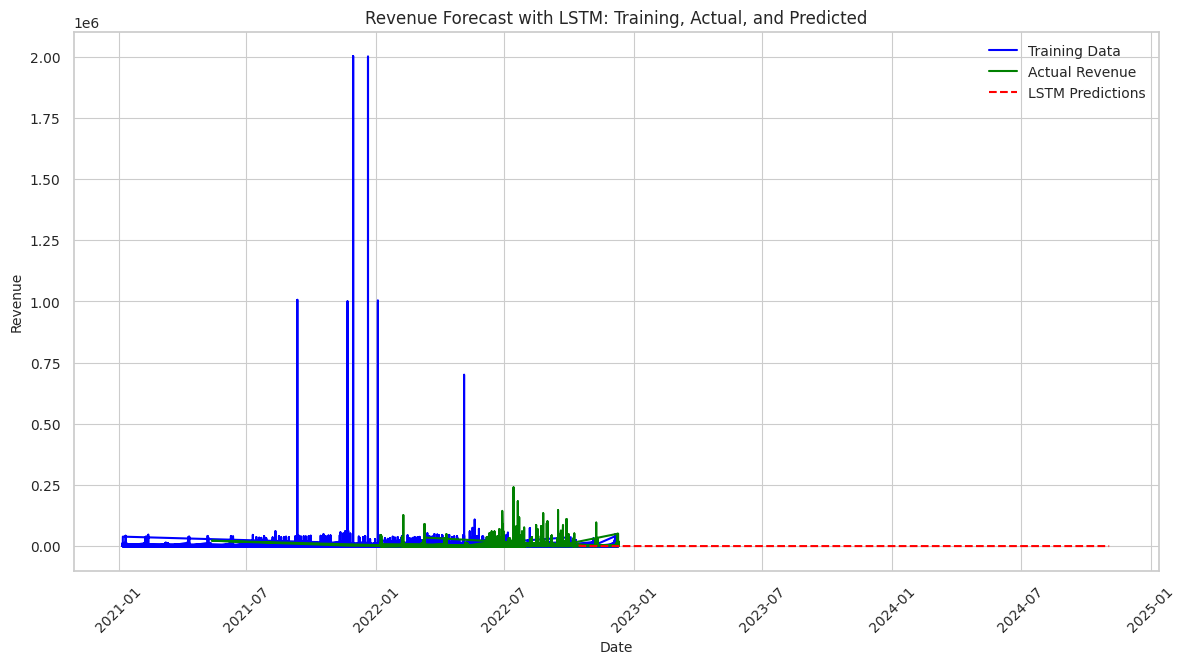

In [ ]:
import matplotlib.pyplot as plt

# Training data dates and values
train_dates = pd.to_datetime(lstm_data['date1'][:split_index])
train_values = lstm_data['amount'][:split_index]

# Actual revenue data dates and values (excluding training data)
actual_dates = pd.to_datetime(lstm_data['date1'][split_index:])
actual_values = lstm_data['amount'][split_index:]

# Prediction dates and values (starting the day after the last known actual date)
last_actual_date = pd.to_datetime(lstm_data['date1'].iloc[-1])
prediction_dates = pd.date_range(start=last_actual_date + pd.Timedelta(days=1), periods=len(generated_predictions), freq='D')

# Plotting
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train_dates, train_values, label='Training Data', color='blue')

# Plot actual revenue data
plt.plot(actual_dates, actual_values, label='Actual Revenue', color='green')

# Plot LSTM predictions
plt.plot(prediction_dates, generated_predictions, label='LSTM Predictions', linestyle='--', color='red')

plt.title('Revenue Forecast with LSTM: Training, Actual, and Predicted')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(data_renamed.shape)

(87907, 22)


In [ ]:
data_renamed.head()

,date1,dataSets,subCounty,Department,Revenue Category,Service Type,Specific Service,Transaction Type,amount,year,...,billType_General Bills,billType_House/Stall bill,billType_POS,billType_Property Application Bills,billType_SBP/Liquor related Bills,billType_Vehicle bill,subCounty_encoded,Department_encoded,Revenue Category_encoded,Service Type_encoded
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-10,2021-08-10,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Passion Fruit(Full Bag (50kg)),Market,120.0,2021,...,0,0,1,0,0,0,4,6,6,18
2021-08-10,2021-08-10,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Sweet Potatoes(1 Bag 50kg),Market,300.0,2021,...,0,0,1,0,0,0,4,6,6,18
2021-08-10,2021-08-10,POS-Collectors,Kirinyaga Central,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Potatoes(Per 50kg Sack),Market,120.0,2021,...,0,0,1,0,0,0,1,6,6,18
2021-08-10,2021-08-10,POS-Collectors,Ndia,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,Potatoes(½ Sack),Market,40.0,2021,...,0,0,1,0,0,0,4,6,6,18
2021-08-10,2021-08-10,POS-Collectors,Kirinyaga Central,"Trade, Cooperatives, Tourism & Industry",County Markets And Cess Collection Charges,County Markets,All Other Vegetables(½ Sack),Market,200.0,2021,...,0,0,1,0,0,0,1,6,6,18


**Training XGBoost**

**Label Encoding**

This method assigns an integer to each category. It's more memory-efficient but implies an arbitrary order, which might not be desired for nominal variables.

In [ ]:
# Applying One-Hot Encoding to categorical features
X_encoded = pd.get_dummies(data_renamed.drop(['amount', 'date1'], axis=1))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Proceed with defining, training, and evaluating the XGBoost model as described previously


**Step 1: Encode Categorical Features and Prepare the Data**

In [ ]:
# Apply One-Hot Encoding to categorical features
X_encoded = pd.get_dummies(data_renamed.drop(['amount', 'date1'], axis=1))

# 'y' remains the same as defined previously
y = data_renamed['amount']

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


**Step 2: Define the XGBoost Model**

In [ ]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)


**Step 3: Train XGBoost Model**

In [ ]:
# Clean up column names by replacing or removing problematic characters
X_encoded.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_encoded.columns]

# Now you can proceed with splitting the data, training, and evaluating the model with the cleaned column names
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

xgb_model.fit(X_train_encoded, y_train)

xgb_predictions = xgb_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, xgb_predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)


# Print evaluation metrics
print(f"XGBoost Model MSE: {mse}")
print(f"XGBoost Model RMSE: {rmse}")
print(f"XGBoost Model MAPE: {mape}")
print(f"XGBoost Model R²: {xgb_r2}")


XGBoost Model MSE: 476814146.22268426
XGBoost Model RMSE: 21836.074423363836
XGBoost Model MAPE: 3.063963586172579e+16
XGBoost Model R²: -0.014473686117529416


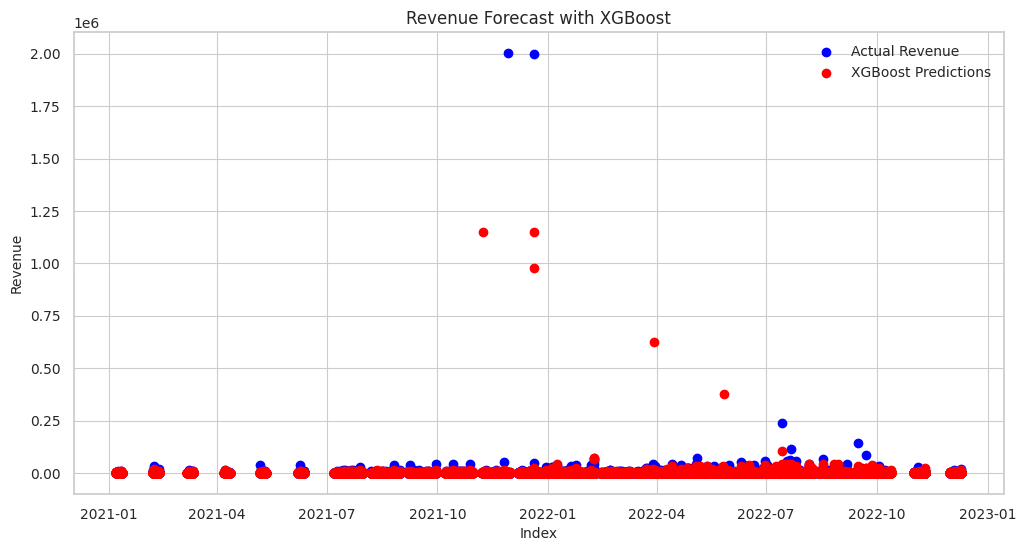

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual Revenue', color='blue')  # Use scatter for actual values
plt.scatter(y_test.index, xgb_predictions, label='XGBoost Predictions', color='red')  # Use scatter for predictions
plt.title('Revenue Forecast with XGBoost')
plt.xlabel('Index')  # Replace with 'Date' if date alignment is available
plt.ylabel('Revenue')
plt.legend()
plt.show()


**Training Meta's Prophet Model**

In [ ]:
!pip install prophet

**Step 1: Prepare the Data**

In [ ]:
import pandas as pd

# Sample data preparation
ds = pd.date_range(start='2023-01-01', periods=365, freq='D')
y = np.random.normal(size=365, loc=200, scale=10)  # Simulated daily revenue

df = pd.DataFrame({'ds': ds, 'y': y})


In [ ]:
prophet_data = data_renamed[['date1', 'amount']].rename(columns={'date1': 'ds', 'amount': 'y'})
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])

**Step 2: Instantiate the Model**

In [ ]:
from prophet import Prophet

# Instantiate a Prophet model
prophet_model = Prophet()



**Step 3: Fit the Model**

In [ ]:
# Fit the model with your DataFrame
prophet_model.fit(prophet_data)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu3gu4_m/tffs8nig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu3gu4_m/wzeibupr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27466', 'data', 'file=/tmp/tmpxu3gu4_m/tffs8nig.json', 'init=/tmp/tmpxu3gu4_m/wzeibupr.json', 'output', 'file=/tmp/tmpxu3gu4_m/prophet_model_pwftpyf/prophet_model-20240313094333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:43:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:43:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Step 4: Create Future Dates**

In [ ]:
#future = model.make_future_dataframe(periods=365)  # Predicting the next 365 days
# Create a future DataFrame that extends to the end of 2024
future_dates = prophet_model.make_future_dataframe(periods=(pd.Timestamp('2024-12-31') - prophet_data['ds'].max()).days)


**Step 5: Make Predictions**

In [ ]:
#forecast = model.predict(future)
# Use the model to make predictions
forecast = prophet_model.predict(future_dates)



In [ ]:
# Assuming 'forecast' is the DataFrame containing the Prophet forecast and 'prophet_data' contains the actual values
forecast_with_actuals = forecast.set_index('ds')[['yhat']].join(prophet_data.set_index('ds'))


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Ensure we're only calculating metrics for rows with both actual and predicted values
forecast_with_actuals.dropna(inplace=True)

# Calculate MSE
mse = mean_squared_error(forecast_with_actuals['y'], forecast_with_actuals['yhat'])

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE, excluding rows where actual 'y' values are zero
mape = mean_absolute_percentage_error(forecast_with_actuals[forecast_with_actuals['y'] != 0]['y'], forecast_with_actuals[forecast_with_actuals['y'] != 0]['yhat'])

prophet_r2 = r2_score(forecast_with_actuals['y'], forecast_with_actuals['yhat'])

# Print the evaluation metrics
print(f"Prophet Model MSE: {mse}")
print(f"Prophet Model RMSE: {rmse}")
print(f"Prophet Model MAPE: {mape}")
print(f"Prophet Model R²: {prophet_r2}")


Prophet Model MSE: 214789404.46948883
Prophet Model RMSE: 14655.695291233673
Prophet Model MAPE: 10.005765765108658
Prophet Model R²: 0.0014564361187661135


**Step 6: Visualize the Forecast**

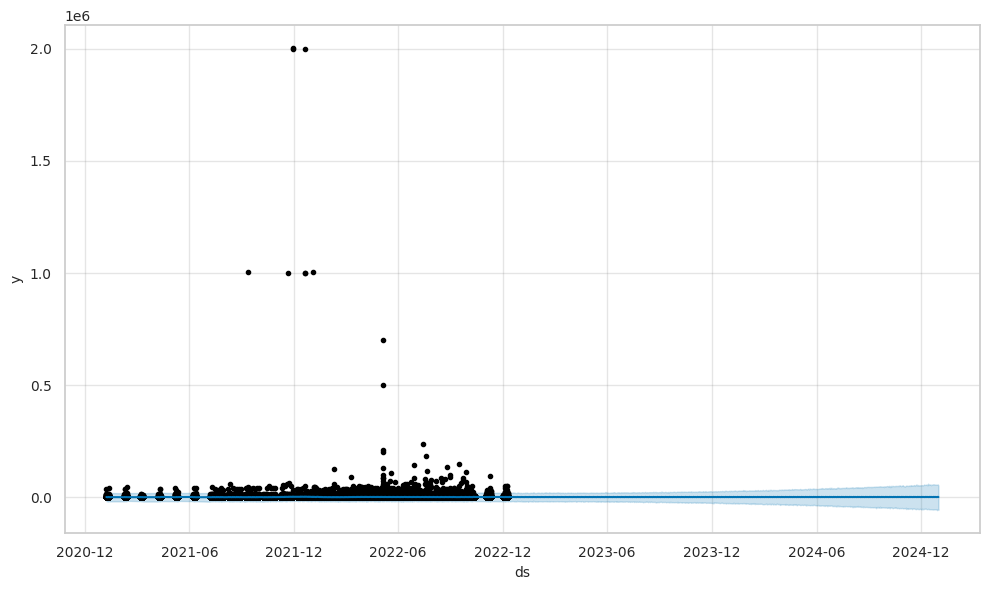

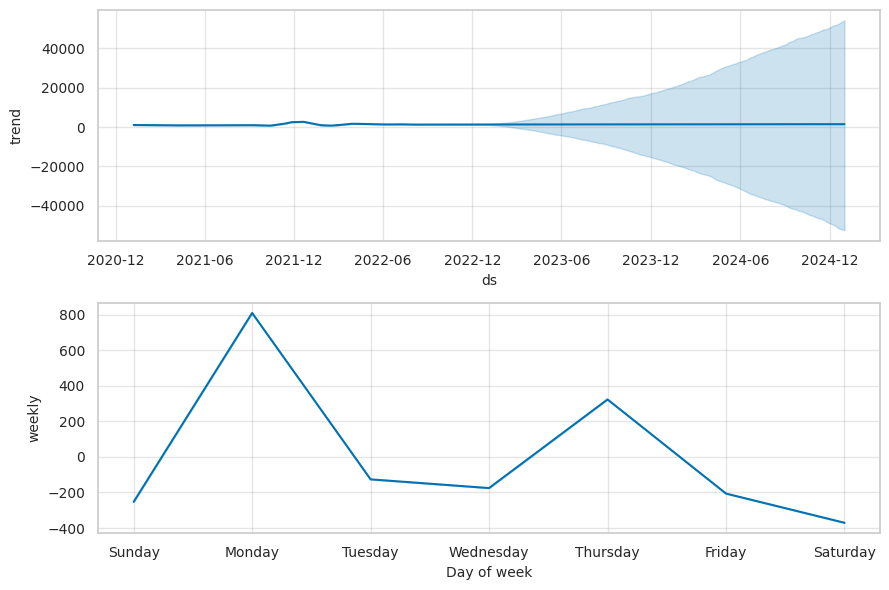

In [ ]:
# Plot the forecast
fig1 = prophet_model.plot(forecast)

# Plot forecast components
fig2 = prophet_model.plot_components(forecast)



**Subcounty Revenue**

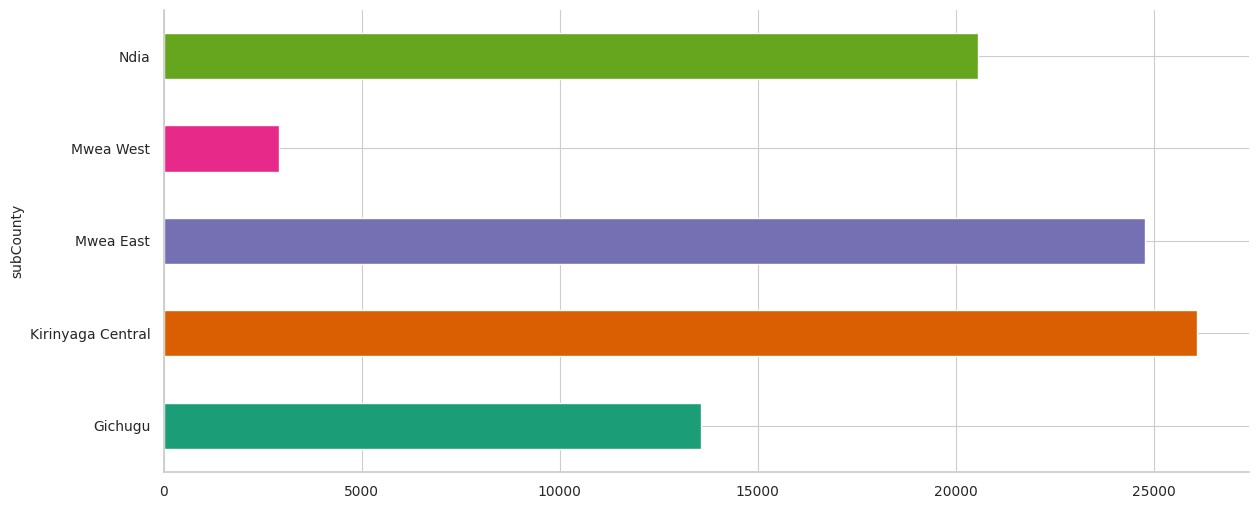

In [ ]:
# @title subcounty

from matplotlib import pyplot as plt
import seaborn as sns
data_renamed.groupby('subCounty').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Comparison of the three Models**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Assuming 'aligned_test_data_flat' contains the actual test values and 'test_predictions_flat' contains the LSTM predictions
lstm_mse = mean_squared_error(aligned_test_data_flat, test_predictions_flat)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mape = mean_absolute_percentage_error(aligned_test_data_flat, test_predictions_flat)


In [ ]:
# Assuming 'y_test' contains the actual test values and 'xgb_predictions' contains the XGBoost predictions
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions)


In [ ]:
# Assuming 'forecast' is the DataFrame containing the Prophet forecast, which includes a 'yhat' column with predictions
# And 'prophet_data' contains the actual values with 'ds' as the date column and 'y' as the actual values
forecast_with_actuals = forecast.set_index('ds')[['yhat']].join(prophet_data.set_index('ds'))
forecast_with_actuals.dropna(inplace=True)  # Drop rows without actual values

prophet_mse = mean_squared_error(forecast_with_actuals['y'], forecast_with_actuals['yhat'])
prophet_rmse = np.sqrt(prophet_mse)
prophet_mape = mean_absolute_percentage_error(forecast_with_actuals['y'], forecast_with_actuals['yhat'])


In [ ]:
# Update the metrics DataFrame to include R-squared values
metrics_df = pd.DataFrame({
    'LSTM': {'MSE': lstm_mse, 'RMSE': lstm_rmse, 'MAPE': lstm_mape, 'R2': lstm_r2},
    'XGBoost': {'MSE': xgb_mse, 'RMSE': xgb_rmse, 'MAPE': xgb_mape, 'R2': xgb_r2},
    'Prophet': {'MSE': prophet_mse, 'RMSE': prophet_rmse, 'MAPE': prophet_mape, 'R2': prophet_r2}
}).T

# Display or export the updated DataFrame
print(metrics_df)
# metrics_df.to_csv('path/to/save/model_metrics_with_r2.csv', index=True)


                  MSE          RMSE          MAPE        R2
LSTM     2.886012e+07   5372.161264  9.876699e+16 -0.026486
XGBoost  4.768141e+08  21836.074423  3.063964e+16 -0.014474
Prophet  2.147894e+08  14655.695291  4.339857e+16  0.001456


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Sample code to train a classifier
# Assuming X_train and y_train are your features and labels respectively
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Now that classifier is defined and trained, you can pickle it
import pickle

with open("classifier.pkl", "wb") as pickle_out:
    pickle.dump(classifier, pickle_out)


ValueError: Unknown label type: 'continuous'

**To scrap below codes from here**

**Identifying Outliers**

In [ ]:
# Identifying outliers in the 'amount' column using the IQR (Interquartile Range) method
Q1 = data_renamed['amount'].quantile(0.25)
Q3 = data_renamed['amount'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as those beyond 1.5 times the IQR from the quartiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the dataset to include only the outlier transactions
outliers = data_renamed[(data_renamed['amount'] < lower_bound) | (data_renamed['amount'] > upper_bound)]

# Visualizing outliers with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_renamed['amount'])
plt.title('Boxplot of Amounts Highlighting Outliers')
plt.xlabel('Amount')
plt.xscale('log')  # Using logarithmic scale due to wide range of amounts
plt.show()

# Summary of outliers
outliers_summary = outliers.describe(include='all', datetime_is_numeric=True)

outliers.head(), outliers_summary


In [ ]:
# General info
data.info()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Analysis: Total amount per month over time
plt.figure(figsize=(14, 7))
data_renamed.groupby(['Date'])['amount'].sum().plot(kind='line', marker='o')
plt.title('Total Transaction Amount Over Time')
plt.xlabel('Time (Year, Month)')
plt.ylabel('Total Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

# Subcounty and Revenue Category Analysis: Average amount per subcounty_revenue
plt.figure(figsize=(14, 7))
subcounty_revenue_avg = data_renamed.groupby('subCounty')['amount'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=subcounty_revenue_avg.values, y=subcounty_revenue_avg.index)
plt.title('Top 10 Subcounty and Revenue Category Combinations by Average Transaction Amount')
plt.xlabel('Average Amount(in Millions)')
plt.ylabel('Subcounty_Revenue')
plt.show()

# Amount Categories Visualization: Count of transactions in each amount category
plt.figure(figsize=(10, 6))
sns.countplot(x=amount_categories)
plt.title('Distribution of Transactions by Amount Categories')
plt.xlabel('Amount Category')
plt.ylabel('Count of Transactions')
plt.show()


**Total Transaction Amount Over Time**

The line graph shows the total transaction amount per month over the available time period. This visualization can help identify trends, seasonality, and any significant changes in transaction volumes over time.

**Top 10 Subcounty and Schedule Combinations by Average Transaction Amount**

The bar chart highlights the top 10 combinations of subcounty and schedule categories based on the average transaction amount. This can help identify which areas and schedule parts are associated with higher transaction values.

**Distribution of Transactions by Amount Categories**

The count plot shows the distribution of transactions across the 'Low', 'Medium', and 'High' amount categories. This visualization helps in understanding the proportion of transactions in each category and can inform targeted analysis for each segment.

**Comparative Analysis**

In [ ]:
# Compare Transaction Volumes by Subcounty
plt.figure(figsize=(14, 7))
subcounty_volumes = data_renamed['subCounty'].value_counts()
sns.barplot(x=subcounty_volumes.index, y=subcounty_volumes.values)
plt.title('Transaction Volumes by Subcounty')
plt.xlabel('Subcounty')
plt.ylabel('Transaction Volume')
plt.xticks(rotation=45)
plt.show()

# Analyze Seasonal Variations in Transaction Amounts
plt.figure(figsize=(14, 7))
data_renamed.groupby(['Date'])['amount'].sum().plot(kind='bar')
plt.title('Seasonal Variations in Transaction Amounts by Date')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=0)
plt.show()

# # Amount Category Comparison by Subcounty
# plt.figure(figsize=(14, 7))
# sns.countplot(x='subCounty', hue=amount_categories, data=data_renamed)
# plt.title('Transaction Amount Categories by Subcounty')
# plt.xlabel('Subcounty')
# plt.ylabel('Count of Transactions')
# plt.xticks(rotation=45)
# plt.legend(title='Amount Category')
# plt.show()


**Compare Transaction Volumes by Subcounty**

Analyze how transaction volumes vary across different subcounties.
Analyze Seasonal Variations: Examine how transaction volumes or amounts change with seasons or months, potentially identifying seasonal patterns.
Amount Category Comparison: Compare other variables (like subcounties or schedules) based on the amount categories ('Low', 'Medium', 'High') we previously defined.

**Transaction Volumes by Subcounty**

The bar chart shows the number of transactions for each subcounty. This visualization helps identify which subcounties have higher transaction activity, which could be indicative of economic activity, population density, or other factors.

**Seasonal Variations in Transaction Amounts by Month**

The bar chart for each month displays the total transaction amounts, highlighting any seasonal variations. This can be useful for identifying peak periods of economic activity or seasonal trends in transactions.

**Transaction Amount Categories by Subcounty**

The count plot with hues representing the 'Low', 'Medium', and 'High' amount categories shows how transactions are distributed across these categories within each subcounty. This comparison can help in understanding the economic profile of transactions in different areas.

In [ ]:
# Summary statistics for the 'amount' column
amount_stats = data['amount'].describe()

**Plotting Distribution of Revenue**

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime type
#data['Date'] = pd.to_datetime(data['Date'])

# Plotting the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data_renamed['date1'], data_renamed['amount'], label='amount')
plt.title('Revenue Collected Over Time')
plt.xlabel('Date')
plt.ylabel('Amount in Millions  (KES)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Plotting distribution of revenue
plt.figure(figsize=(8, 4))
sns.histplot(data['amount'], bins=50, kde=True)
plt.title('Distribution of Revenue Collected')
plt.xlabel('Frequency')
plt.ylabel('Amount in Kshs')
plt.show()

**Amount Distribution**

The amount column, representing the revenue collected, ranges from 0 to about 2,002,070 with an average (mean) of approximately 1,362.
The distribution is right-skewed, indicating that most revenue amounts are on the lower side, but there are a few instances with very high revenue.
The standard deviation is quite large (14,661), suggesting significant variability in the revenue amounts collected.

**Daily Revenue Collection Over Time**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Convert 'date1' to datetime format
data_renamed['date1'] = pd.to_datetime(data_renamed['date1'], format='%d/%m/%Y %H:%M:%S')

# Filter the data to include dates up to the end of 2023
end_date = '2023-12-31'
data_renamed = data_renamed[data_renamed['date1'] <= pd.to_datetime(end_date)]

# Aggregate revenue data on a daily basis
daily_revenue = data_renamed.resample('D', on='date1')['amount'].sum()

# Plotting the time series of daily revenue
plt.figure(figsize=(8, 2))
plt.plot(daily_revenue)
plt.title('Daily Revenue Collection Up to 2022')
plt.xlabel('Date')
plt.ylabel('Total Revenue (Millions)')
plt.grid(True)
plt.show()


In [ ]:
# Convert the 'date1' column to datetime format and aggregate the amounts collected daily
data_renamed['date1'] = pd.to_datetime(data_renamed['date1'], errors='coerce')
daily_data = data_renamed.groupby(data_renamed['date1'].dt.date)['amount'].sum()

# Display the first few rows of the aggregated data
daily_data.head()


The dataset contains several columns, including dates, sub-county names, schedule types, amounts collected, and other details. For the purpose of forecasting the total amount of money collected by the County Government of Kirinyaga using a SARIMA model, we should focus on the date1 and amount columns. Our goal will be to aggregate these amounts over a suitable time period (e.g., daily, weekly, or monthly, quartely and yearly) and then analyze this time series data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plotting the daily data
plt.figure(figsize=(8, 2))  # Adjusted the figure size for better visibility
plt.plot(daily_data)
plt.title('Daily Total Revenue Collected by Kirinyaga County Government')
plt.xlabel('Date')
plt.ylabel('Amount Collectedin Millions Kshs')
plt.grid(True)  # Adding grid lines for better readability of dates
plt.show()



**Analysis of Seasonality in Revenue Data**

In [ ]:
# Resampling data on different time scales for seasonality analysis
monthly_revenue = data_renamed.resample('M', on='date1')['amount'].sum()
weekly_revenue = data_renamed.resample('W', on='date1')['amount'].sum()
daily_revenue = data_renamed.resample('D', on='date1')['amount'].sum()

# Plotting revenue trends on different time scales
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Monthly Revenue
axes[0].plot(monthly_revenue)
axes[0].set_title('Monthly Revenue Trend')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Revenue(Millions)')
axes[0].grid(True)

# Weekly Revenue
axes[1].plot(weekly_revenue)
axes[1].set_title('Weekly Revenue Trend')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Total Revenue(Millions)')
axes[1].grid(True)

# Daily Revenue
axes[2].plot(daily_revenue)
axes[2].set_title('Daily Revenue Trend')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Total Revenue(Millions)')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Analyzing revenue distribution across different sub-counties
subcounty_revenue = data_renamed.groupby('subCounty')['amount'].sum().sort_values(ascending=False)

# Analyzing revenue distribution across different schedules
schedule_revenue = data_renamed.groupby('Department')['amount'].sum().sort_values(ascending=False)

subcounty_revenue, schedule_revenue



**Monthly Revenue Trend:**

The monthly revenue trend shows some fluctuations, indicating possible seasonal patterns or effects of specific events.

**Weekly Revenue Trend:**

The weekly trend also displays variability, suggesting that revenue collection might be influenced by weekly cycles or activities.

**Daily Revenue Trend:**

Daily trends are more erratic, which is expected due to daily variations in transactions.
Revenue Distribution Across Categories
Sub-County Revenue:
Kirinyaga Central leads in revenue collection, followed by Ndia, Mwea East, Gichugu, and Mwea West. This distribution could be influenced by economic activities, population, or administrative focus in these sub-counties.

**Revenue by Schedules:**

The 'Trade, Cooperatives, Tourism & Industry' category has the highest revenue, significantly more than other categories like 'Land Housing & Urban Development', 'Transport & Public Works', and 'Agriculture, Livestock,
Veterinary & Fisheries'.
The lowest revenue is from 'Weights and Measures', which could be due to the nature of services or fees associated with this category.

**Model Deployment**

In [ ]:
#saving the model
import pickle
pickle.dump(model, open('model.pkl','wb'))


In [ ]:
import joblib

# Assuming sarima_result is your fitted SARIMA model
joblib.dump(sarima_result, 'sarima_model.pkl')


In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the SARIMA model
model = joblib.load('sarima_model.pkl')

@app.route('/forecast', methods=['POST'])
def forecast():
    # Extract the date range from the request
    data = request.get_json()
    start_date = pd.to_datetime(data['start_date'])
    end_date = pd.to_datetime(data['end_date'])

    # Generate date range for prediction
    forecast_dates = pd.date_range(start=start_date, end=end_date)

    # Generate predictions
    predictions = model.get_forecast(len(forecast_dates)).predicted_mean

    # Convert predictions to a list for JSON response
    predictions = predictions.tolist()

    # Send the response
    return jsonify(predictions)

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
import requests
import json

# The URL of your Flask app
url = 'http://127.0.0.1:5000/forecast'

# Example data payload
data = {
    'start_date': '2023-01-01',
    'end_date': '2023-12-31'
}

# Sending a POST request
response = requests.post(url, json=data)

# Printing the response
print(response.json())
